# Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


### Loading the Dataset

In [11]:
# loading the csv data to a Pandas DataFrame
df= pd.read_csv('Student Data.csv')

In [12]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [13]:
df.tail()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5819,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [14]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


Inference :

*Descrpitive statistics of columns difficulty, Q1, Q2....Q28 are almost same.
*Mean and Median of class column approximately same.

In [15]:
print(df.shape)
df.info()

(5820, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 no

0


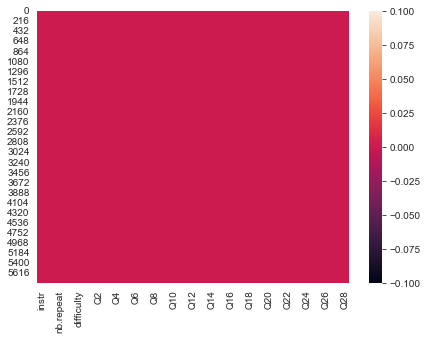

In [16]:
print(df.isnull().any().sum())
plt.figure(figsize=(7, 5))
sns.heatmap(df.isnull())
plt.show()

There are noo missing values in the data

<AxesSubplot:xlabel='class', ylabel='count'>

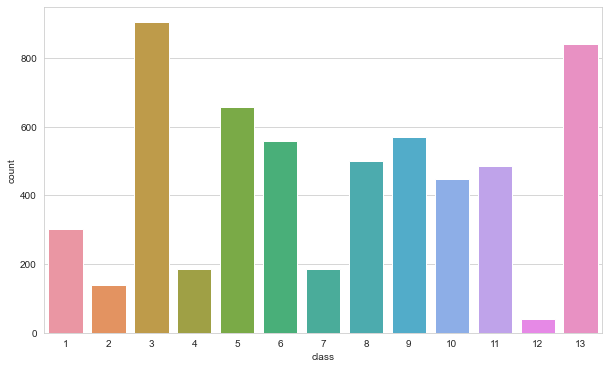

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df)

In [18]:
df.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

<AxesSubplot:xlabel='class', ylabel='count'>

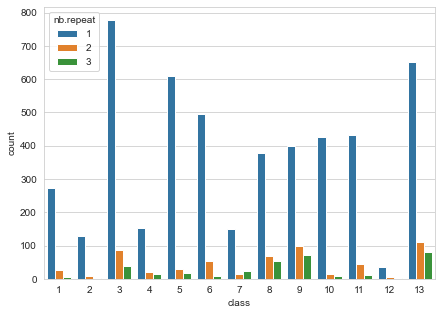

In [19]:
plt.figure(figsize=(7, 5))
sns.countplot(x="class",hue="nb.repeat",data=df)

Course no. 13 is mostly repeated by students

<AxesSubplot:xlabel='difficulty', ylabel='count'>

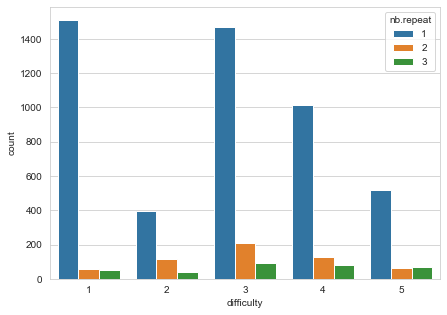

In [20]:
plt.figure(figsize=(7, 5))
sns.countplot(x="difficulty",hue="nb.repeat",data=df)

Easy courses are also repeated by students

<AxesSubplot:xlabel='difficulty', ylabel='count'>

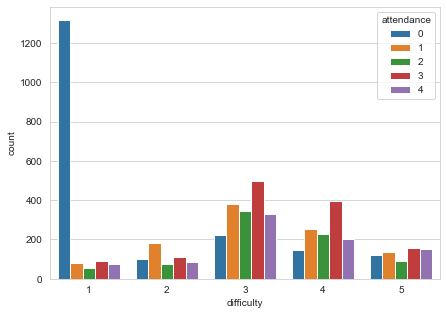

In [21]:
plt.figure(figsize=(7, 5))
sns.countplot(x="difficulty",hue="attendance",data=df)

<AxesSubplot:xlabel='class', ylabel='count'>

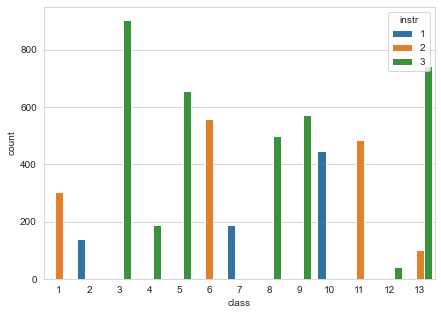

In [22]:
plt.figure(figsize=(7, 5))
sns.countplot(x="class",hue="instr",data=df)

Instructor1:Course No.-2,7,10 Instructor2:Course No.-1,6,11,13 Instructor3:Course No.-3,4,5,8,9,12,13 Course No. 13 is jointly taken by Intructor1,Instructor2 Instructor1 is least popular May be

<AxesSubplot:xlabel='class', ylabel='count'>

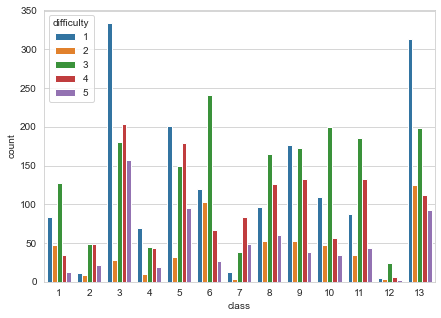

In [23]:
plt.figure(figsize=(7, 5))
sns.countplot(x="class",hue="difficulty",data=df)

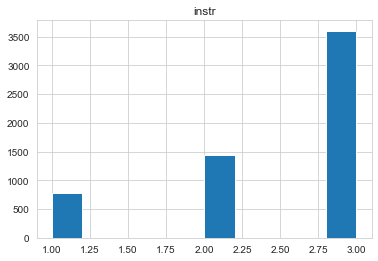

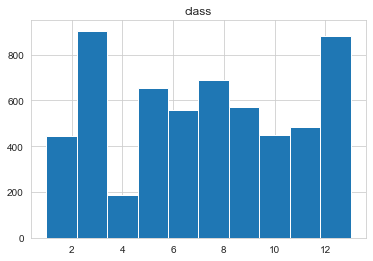

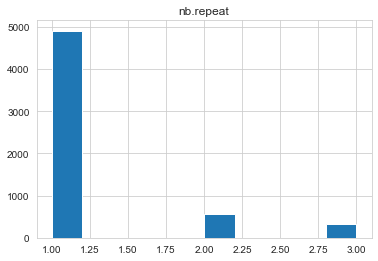

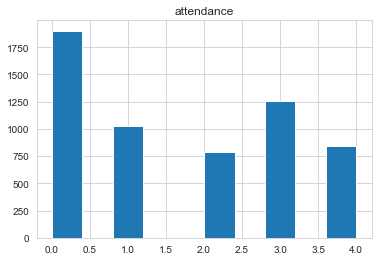

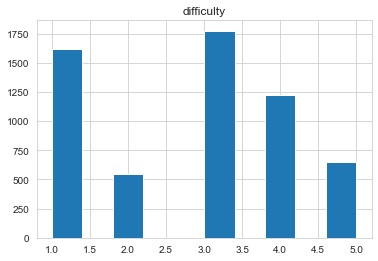

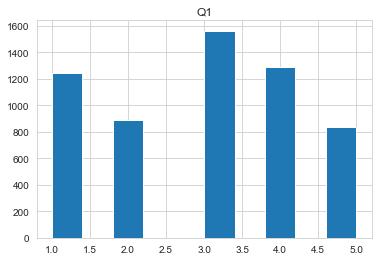

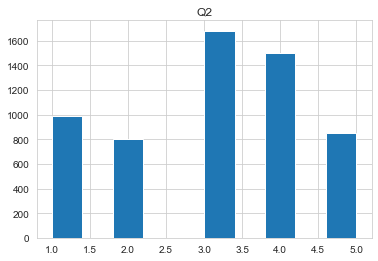

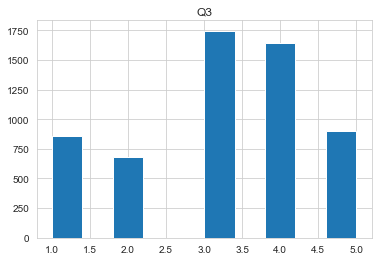

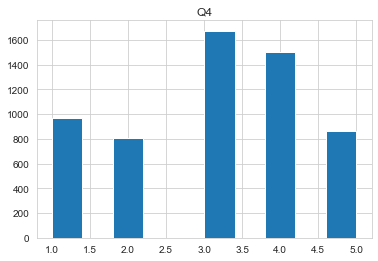

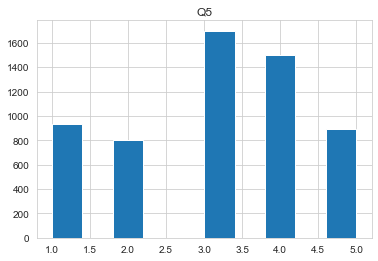

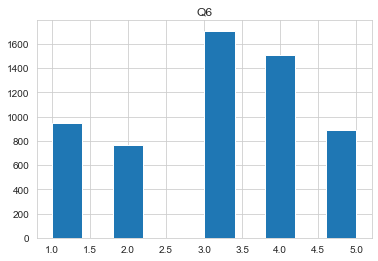

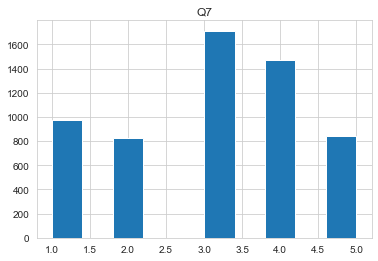

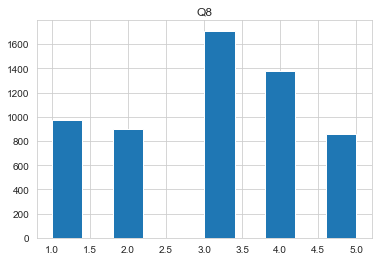

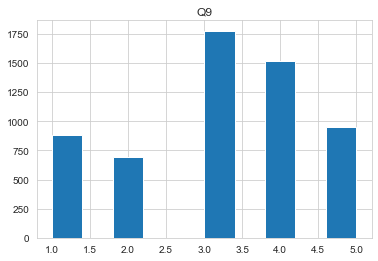

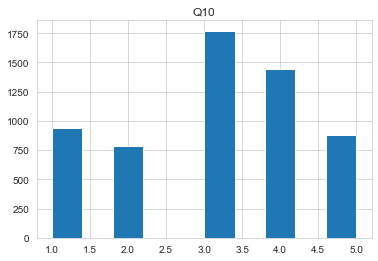

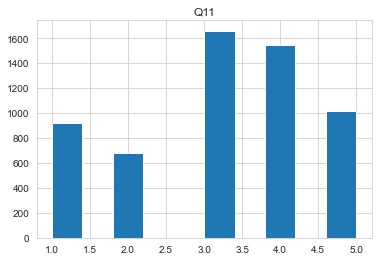

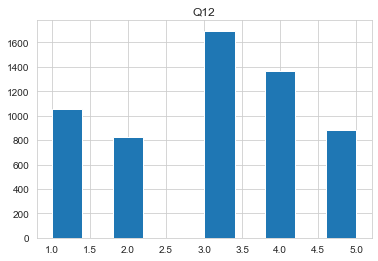

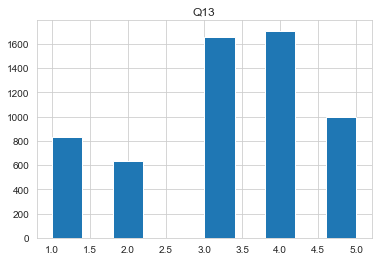

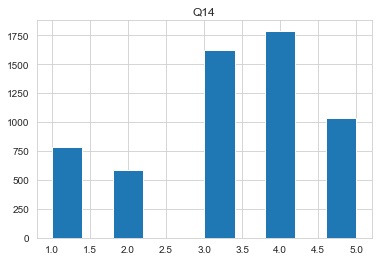

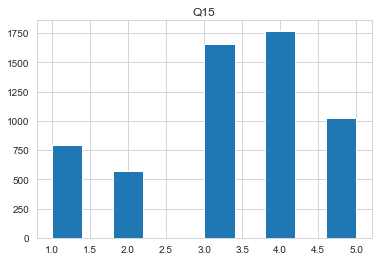

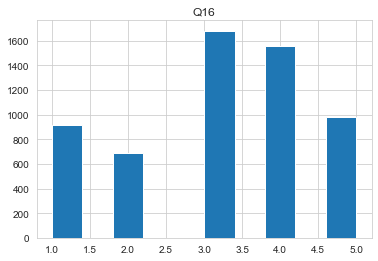

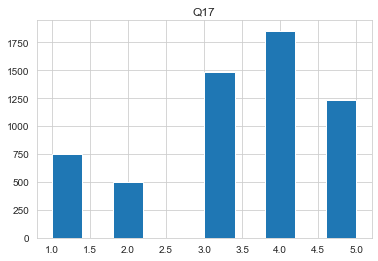

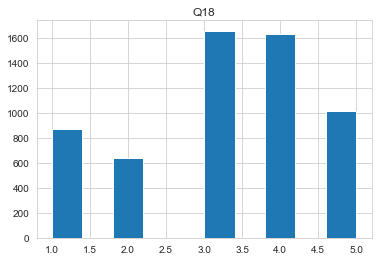

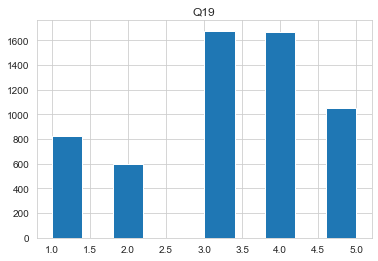

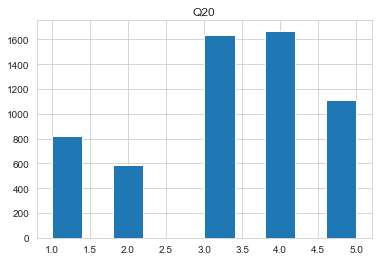

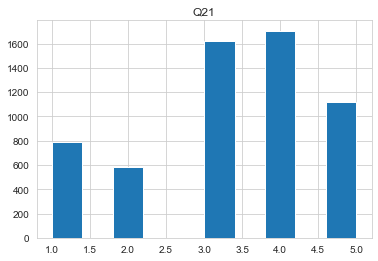

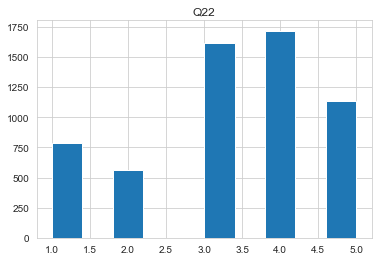

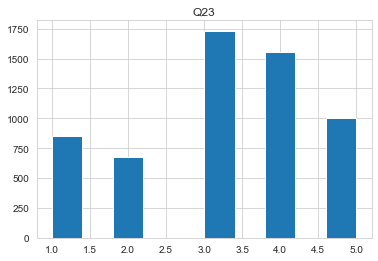

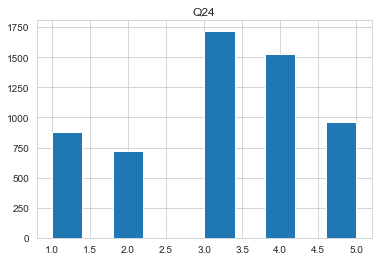

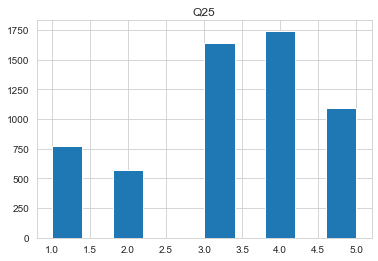

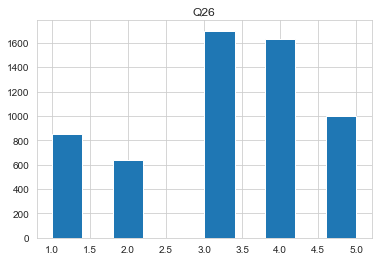

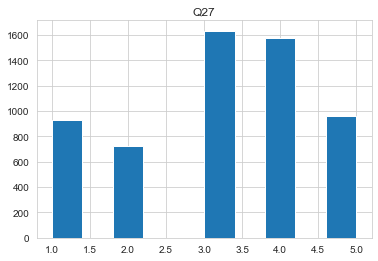

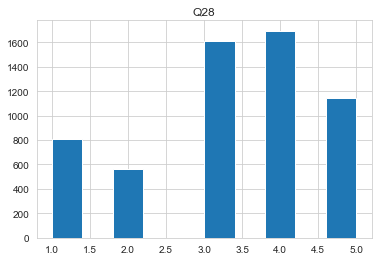

In [24]:
for i in df.columns:
    df.hist(i)
    plt.show()

<AxesSubplot:>

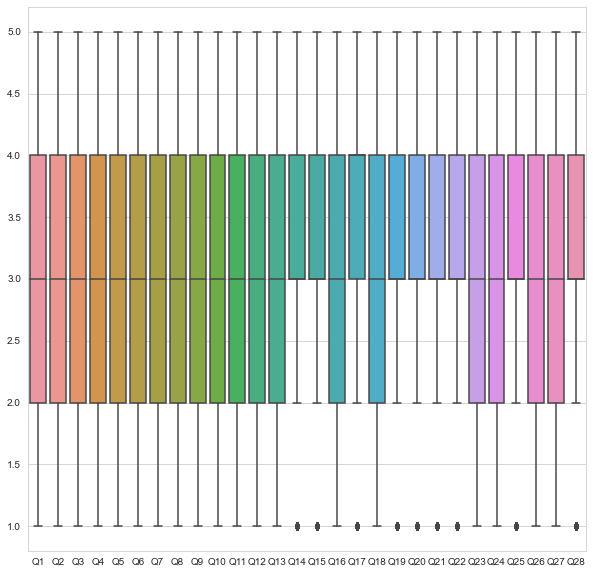

In [25]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df.iloc[:,5:])

**It was observed that Q14,Q15,Q17,Q19:Q22,Q25 and Q28 questions with good rating i.e. very less students have given completely disagree (Rating 1) for Question Q14, Q15, Q17, Q19 - Q22, Q25**

In [26]:
#Lets understand the students have reponded for the questions against classes
# Calculate mean for each question response for all the classes.
questionmeans = []
classlist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
for class_num in range(1,13):
    class_data = df[(df["class"]==class_num)]
    
    questionmeans = []
    classlist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
    #Class related questions are from Q1 to Q12
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12 * [class_num] 
    print(classlist)
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


<AxesSubplot:xlabel='questions', ylabel='mean'>

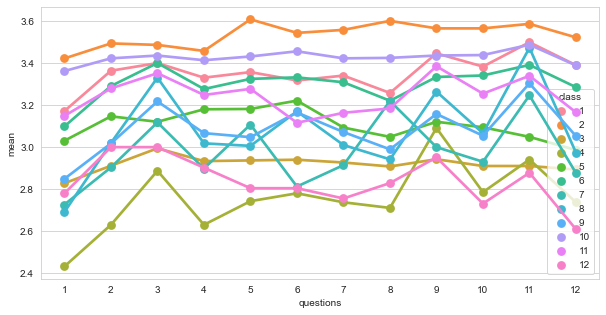

In [27]:
plt.figure(figsize=(10, 5))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

Above graph shows that we have best ratings from Class 2 and worst rateing from class 4 students

In [28]:
#Lets see how rating has been given against instructor wise.
# Calculate mean for each question response for all the classes.
questionmeans = []
inslist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
for ins_num in range(1,4):
    ins_data = df[(df["instr"]==ins_num)]
    questionmeans = []
    inslist = []
    questions = []
    
    for num in range(13,29):
        questions.append(num)
        for col in range(17,33):
            questionmeans.append(ins_data.iloc[:,col].mean())
    inslist += 16 * [ins_num] 
    plotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

<AxesSubplot:xlabel='questions', ylabel='mean'>

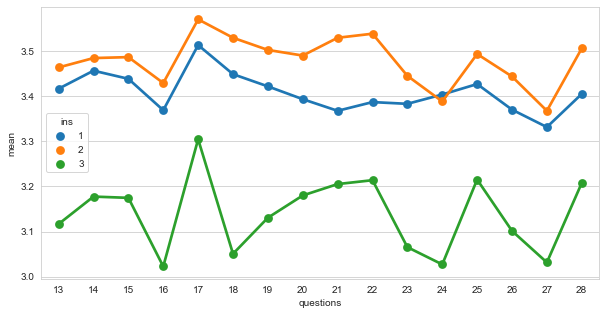

In [29]:
plt.figure(figsize=(10, 5))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="ins")

Based on above graph we can see that according to the student ratings we see that Instructor 1 and 2 are performing well and got similar ratings but Instructor 3 got less ratings. So we can further explore which course instructor 3 teaches and find out the which course got least ratings.

In [30]:
# Calculate mean for each question response for all the classes for Instructor 3
dataset_inst3 = df[(df["instr"]==3)]
class_array_for_inst3 = dataset_inst3["class"].unique().tolist()
questionmeans = []
classlist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
for class_num in class_array_for_inst3:
    class_data = dataset_inst3[(dataset_inst3["class"]==class_num)]
    questionmeans = []
    classlist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
    
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12 * [class_num]
    
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

<AxesSubplot:xlabel='questions', ylabel='mean'>

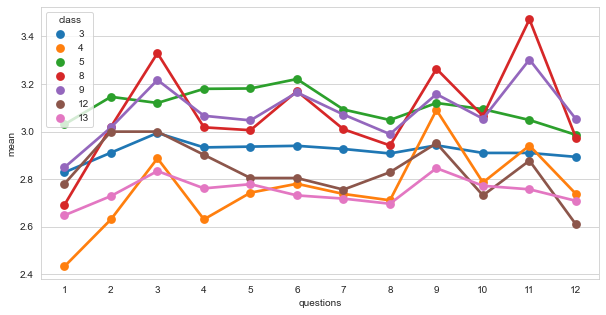

In [31]:
plt.figure(figsize=(10, 5))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

By above analysis we can recommend the instructor 3 for check on course 4 and 13.

### Correlation Heatmap

<AxesSubplot:>

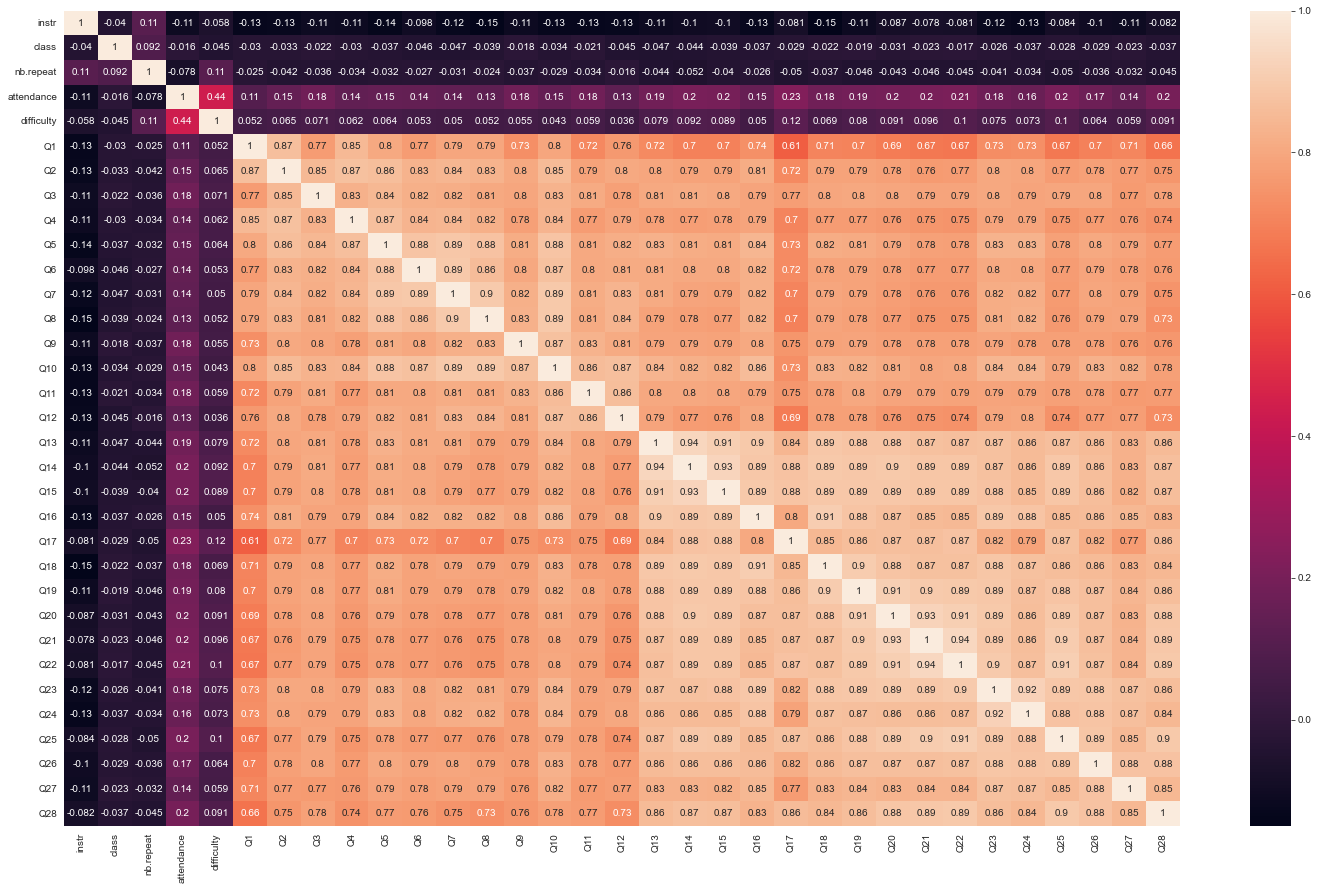

In [32]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True)

### Data Standardization

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [35]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,...,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,...,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


### K Means Clustering 

In [ ]:
cluster_range = range(1,20)
cluster_errors = []
for num_cluster in cluster_range:
    clusters = KMeans(num_cluster)
    clusters.fit(data)
    cluster_errors.append(clusters.inertia_) 

In [26]:
dd=pd.DataFrame({'No of Clusters':cluster_range, 'Cluster Error':cluster_errors})
dd

,No of Clusters,Cluster Error
0,1,192060.000000
1,2,105150.066550
2,3,73956.576471
3,4,65555.563392
4,5,60429.470923
5,6,57626.854512
6,7,55904.717852
7,8,54486.760392
8,9,52891.278652
9,10,52113.490354


Lets find suitable value for k using elbow method 

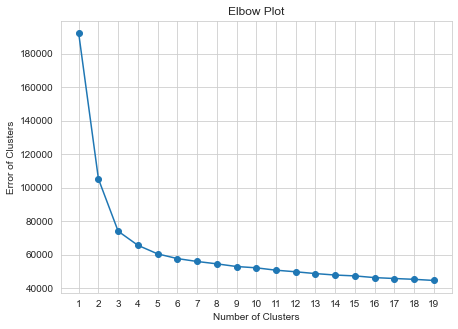

In [27]:
plt.figure(figsize=(7,5))
plt.plot(cluster_range,cluster_errors,marker = 'o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Error of Clusters')
plt.xticks(cluster_range)
plt.show()


Based on the elbow graph we can go for 3 clusters.

In [28]:
kmeans = KMeans(n_clusters=3,init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)
y_kmeans

array([1, 1, 2, ..., 2, 0, 0])

In [29]:
import  collections
k_clusters=collections.Counter(y_kmeans)
k_clusters

Counter({1: 2365, 2: 2225, 0: 1230})

The above counter is for the count of three different clusters formed.

In [30]:
!pip install yellowbrick


#### Checking Silhoutte score for k means clustering

In [31]:
# Calculate cluster validation metrics
score_kmeans_bpca = silhouette_score(data, kmeans.labels_, metric='euclidean')

print('Silhouette Score: %.4f' % score_kmeans_bpca)
# # Inter cluster distance map
# from yellowbrick.cluster import InterclusterDistance
# # Instantiate the clustering model and visualizer
# visualizer = InterclusterDistance(kmeans)
# visualizer.fit(data)        # Fit the data to the visualizer
# visualizer.show() 

Silhouette Score: 0.3193


### Agglomerative Clustering 
Agglomerative Hierarchical Clustering (AHC) is a clustering (or classification) method which has the following advantages:

It works from the dissimilarities between the objects to be grouped together. A type of dissimilarity can be suited to the subject studied and the nature of the data.
One of the results is the dendrogram which shows the progressive grouping of the data. It is then possible to gain an idea of a suitable number of classes into which the data can be grouped.


In [32]:
hier_cluster = linkage(data, method='ward')

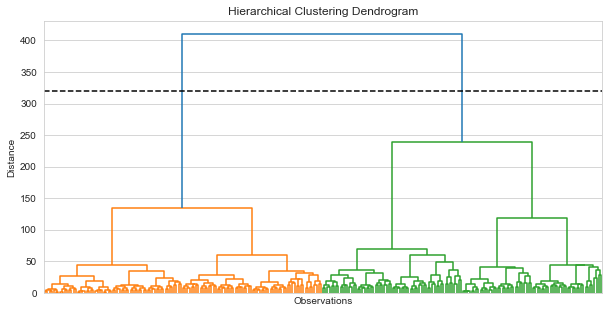

In [33]:
plt.figure(figsize=(10,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_cluster, truncate_mode='level', p = 7, show_leaf_counts=False, no_labels=True)
plt.axhline(y=320
            ,color='black',linestyle='--') 
plt.show()

Dendogram shows that there are 2 clusters formed\
Now since elbow method for k means clustering shows that there are 3 clusters so we will be comparing the agglomerative clustering model for the two different number of clusters\
Further we will check the Silhoutte score in order to finalize the number of clusters for Agglomerative clustering

In [34]:
ac_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean')
ac_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean')

In [35]:
ac_2.fit(data)
ac_3.fit(data)

AgglomerativeClustering(n_clusters=3)

In [36]:
ac_2.labels_

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [37]:
ac_3.labels_

array([2, 2, 1, ..., 1, 0, 0], dtype=int64)

In [38]:
ac_2.clusters=collections.Counter(ac_2.labels_)
ac_2.clusters

Counter({0: 4266, 1: 1554})

In [39]:
ac_3.clusters=collections.Counter(ac_3.labels_)
ac_3.clusters

Counter({2: 2093, 1: 2173, 0: 1554})

In [40]:
# Calculate cluster validation metrics

score_ac_2 = silhouette_score(data, ac_2.labels_, metric='euclidean')
score_ac_3 = silhouette_score(data, ac_3.labels_, metric='euclidean')

print('Silhouette Score for 2 clusters: %.4f' % score_ac_2)
print('Silhouette Score for 3 clusters: %.4f' % score_ac_3)


Silhouette Score for 2 clusters: 0.3925
Silhouette Score for 3 clusters: 0.2818


##### Comparing proportion of observation in different clusters from different clustering techniques.

In [41]:
clusters = ['Kmean','Agglomerative']
pd.DataFrame({'K_Clusters':k_clusters, 'Agglomerative':ac_2.clusters})

,K_Clusters,Agglomerative
1,2365,1554.0
2,2225,NaN
0,1230,4266.0


### Using PCA for dimentionality reduction

Principal component analysis (PCA) is a technique for reducing the dimensionality of datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize the variance.

In [42]:
pca = PCA()

In [43]:
data_pca = pca.fit_transform(data)
print(data_pca.shape)
print(pca.components_)

(5820, 33)
[[ 0.02702299  0.00763628  0.00904588 ... -0.1915978  -0.18721786
  -0.1883336 ]
 [-0.07289543 -0.04063568 -0.00266056 ...  0.03244089 -0.001601
   0.0978247 ]
 [-0.4385327  -0.05890652 -0.05937739 ... -0.11049305 -0.07491874
  -0.1782587 ]
 ...
 [-0.00853126  0.00216576 -0.00279446 ...  0.01915656 -0.02403839
  -0.0265742 ]
 [ 0.00364928  0.00044748 -0.00320714 ... -0.01714022 -0.01096761
  -0.01669541]
 [ 0.00057773  0.0025222   0.00431929 ... -0.0080973  -0.04233965
   0.07289184]]


In [44]:
# np.cumsum is used to calculate the accumulative sum of array
pca.explained_variance_ratio_ 
# The pca.explained_variance_ratio_ parameter returns a vector of the variance explained by each dimension.

array([0.70013168, 0.04524138, 0.03719095, 0.03415561, 0.03131927,
       0.02471041, 0.01595814, 0.01171896, 0.0105679 , 0.00870694,
       0.00767273, 0.00616491, 0.00554352, 0.00516691, 0.00429543,
       0.00418254, 0.0041316 , 0.00359846, 0.00352092, 0.00344927,
       0.00331007, 0.00319521, 0.00303892, 0.00288507, 0.00280566,
       0.00256242, 0.00255236, 0.00242659, 0.00234278, 0.00214297,
       0.00204972, 0.00169022, 0.00157052])

In [45]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.70013168, 0.74537307, 0.78256401, 0.81671962, 0.84803889,
       0.8727493 , 0.88870744, 0.9004264 , 0.9109943 , 0.91970124,
       0.92737397, 0.93353888, 0.9390824 , 0.94424931, 0.94854474,
       0.95272728, 0.95685887, 0.96045734, 0.96397825, 0.96742752,
       0.97073759, 0.9739328 , 0.97697171, 0.97985678, 0.98266244,
       0.98522485, 0.98777721, 0.9902038 , 0.99254658, 0.99468954,
       0.99673926, 0.99842948, 1.        ])

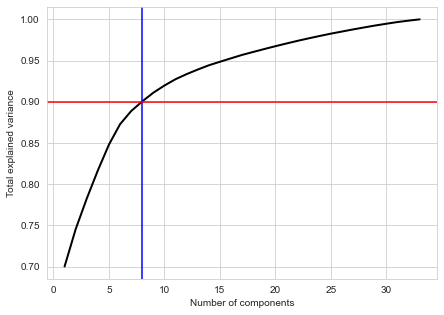

In [46]:
plt.figure(figsize=(7,5))

plt.plot(range(1,34), cumsum, color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axvline(8, c='b')
plt.axhline(0.9, c='r')

plt.show()

As the first 8 components describe 90% variance of the dataset so we choose PCA with 8 components.

In [47]:
pca = PCA(n_components=8)
pca.fit(data)
pca_df=pca.transform(data)
data_pca = pd.DataFrame(pca.transform(data))
data_pca.shape

(5820, 8)

In [48]:
data_pca.head(10)

,0,1,2,3,4,5,6,7
0,0.742313,-0.109720,1.314249,-1.204991,-0.270151,1.967466,-1.256584,-0.213435
1,0.727500,-0.147146,1.281206,-1.411373,-0.169146,1.776011,-0.331666,0.003125
2,-7.586498,0.364230,1.519714,-1.093795,-0.341108,1.509401,-0.487976,-0.019624
3,0.727500,-0.147146,1.281206,-1.411373,-0.169146,1.776011,-0.331666,0.003125
4,9.054785,-1.113471,0.825711,-1.913832,0.105925,2.042082,0.308037,0.148852
5,-3.465004,0.507352,1.567882,-1.377277,-0.206727,1.356062,0.494165,0.193614
6,-3.408806,-0.327695,1.199995,-1.334274,-0.202521,1.737894,-0.388887,0.006448
7,-7.545112,-0.508243,1.118783,-1.257174,-0.235896,1.699778,-0.446109,0.009770
8,-3.550615,-0.365196,1.274419,-1.316220,-0.204982,1.703709,-0.294566,-0.313599
9,-3.506390,1.379825,1.968813,-1.213898,-0.311939,1.165686,0.452298,0.164220


In statistics, kernel density estimation is a non-parametric 
way to estimate the probability density function of a random variable. 

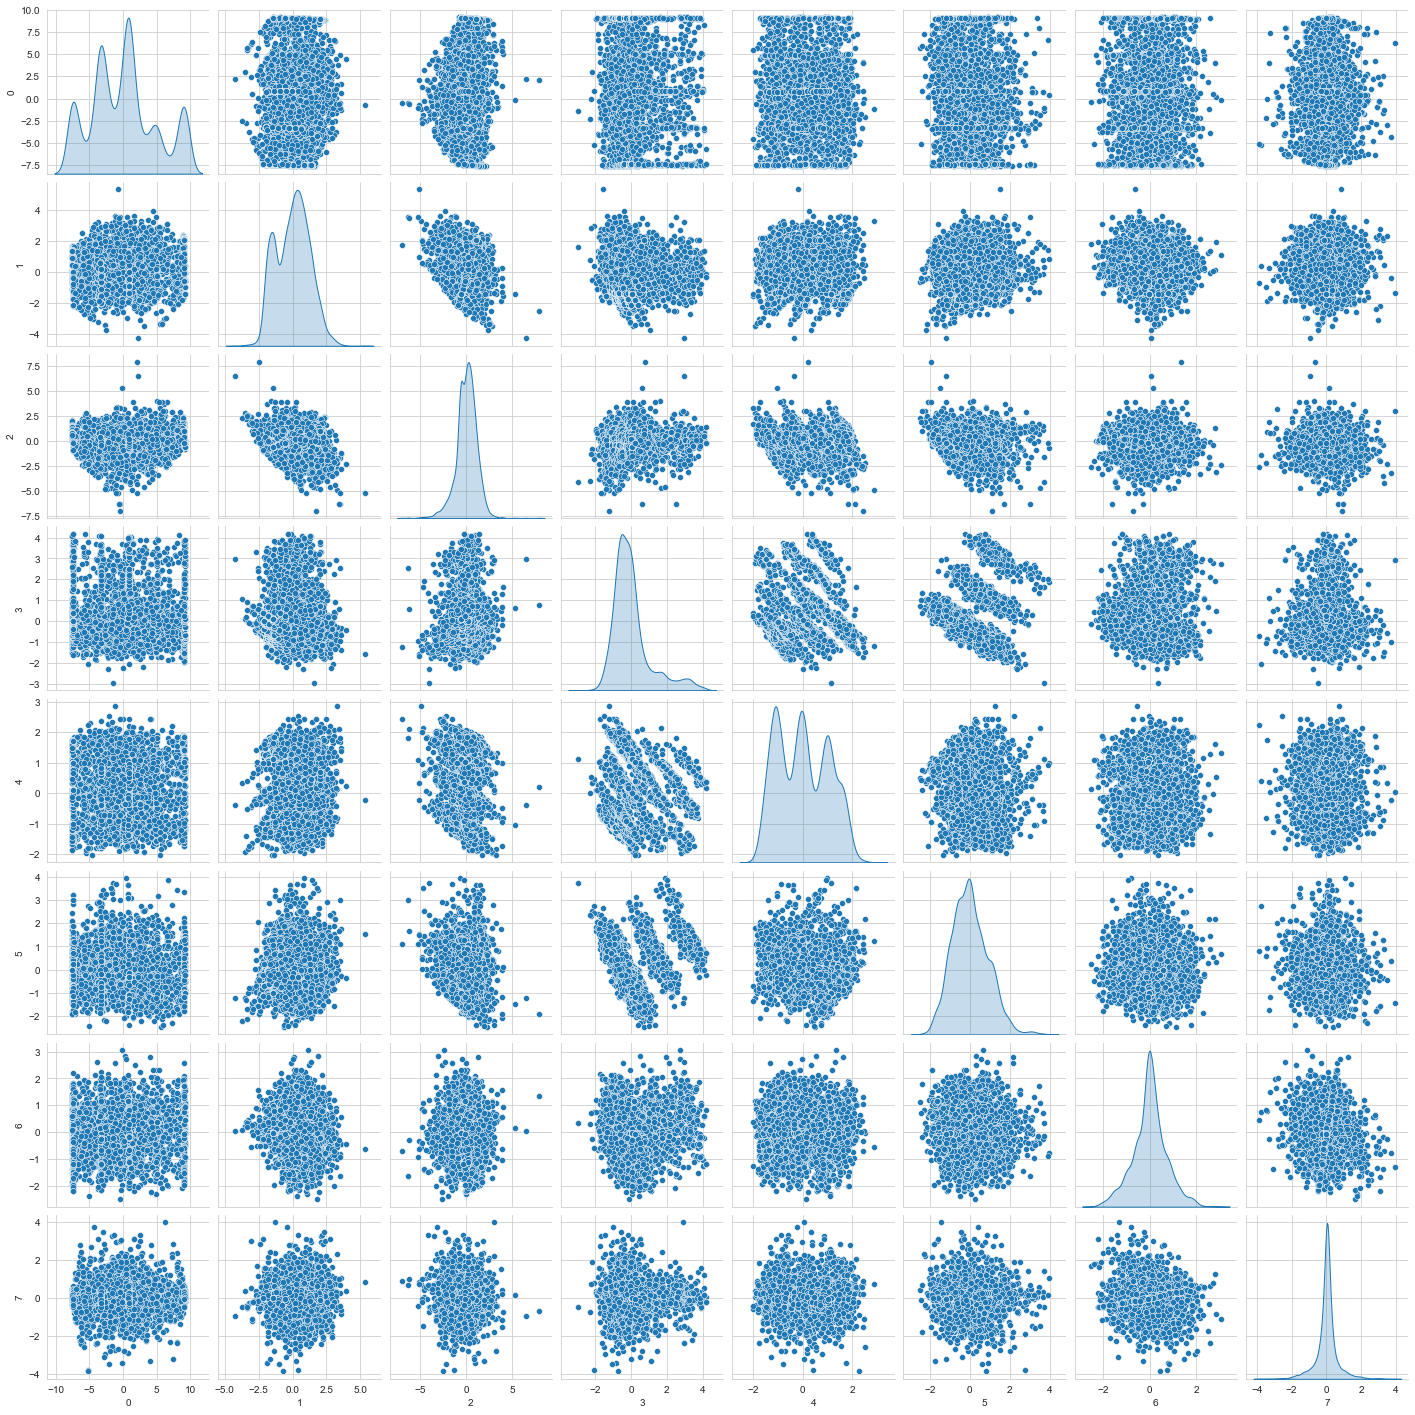

In [49]:
sns.pairplot(data_pca, diag_kind='kde')
plt.show()

### K-Means Clustering after PCA

In [50]:
cluster_range = range(1,20)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init=10, max_iter=100)
    clusters.fit(data_pca)
    
    cluster_errors.append(clusters.inertia_)
    
pd.DataFrame({'No of clusters':cluster_range, 'Cluster error': cluster_errors})

,No of clusters,Cluster error
0,1,172935.890001
1,2,86036.178890
2,3,54858.450877
3,4,46470.764856
4,5,41391.727035
5,6,38618.241509
6,7,36845.962573
7,8,35535.460449
8,9,33872.996944
9,10,33332.923085


#### Elbow Plot to know the number of clusters

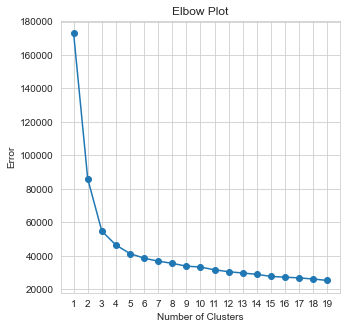

In [51]:
plt.figure(figsize=(5,5))
plt.plot(cluster_range, cluster_errors, marker = "o" )
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.xticks(cluster_range)
plt.show()

From the above plot we can see that the optimal number of clusters we can form is 3

In [52]:
kmeans_apca = KMeans(n_clusters=3,init = 'k-means++', random_state = 42)
y_kmeans_apca = kmeans_apca.fit_predict(data_pca)
y_kmeans_apca

array([2, 2, 1, ..., 1, 0, 0])

In [53]:
k_clusters_apca=collections.Counter(y_kmeans_apca)
k_clusters_apca

Counter({2: 2363, 1: 2226, 0: 1231})

In [54]:
kmeans_apca.labels_

array([2, 2, 1, ..., 1, 0, 0])

In [55]:
# Calculate cluster validation metrics
score_kmeans_apca = silhouette_score(data_pca, kmeans_apca.labels_, metric='euclidean')

print('Silhouette Score: %.4f' % score_kmeans_apca)
# # Inter cluster distance map
# from yellowbrick.cluster import InterclusterDistance
# # Instantiate the clustering model and visualizer
# visualizer = InterclusterDistance(kmeans_apca)
# visualizer.fit(data_pca)        # Fit the data to the visualizer
# visualizer.show() 

Silhouette Score: 0.3624


### Scatter Plot for K Means Clustering

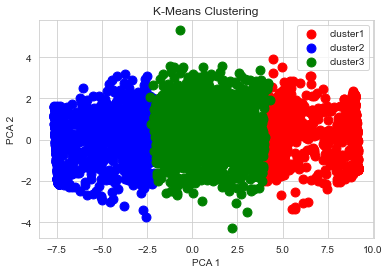

In [56]:
plt.scatter(pca_df[y_kmeans_apca==0,0],pca_df[y_kmeans_apca==0,1],s=80,c='red',label='cluster1')
plt.scatter(pca_df[y_kmeans_apca==1,0],pca_df[y_kmeans_apca==1,1],s=80,c='blue',label='cluster2')
plt.scatter(pca_df[y_kmeans_apca==2,0],pca_df[y_kmeans_apca==2,1],s=80,c='green',label='cluster3')
plt.title("K-Means Clustering")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

### Agglomerative Clustering after PCA

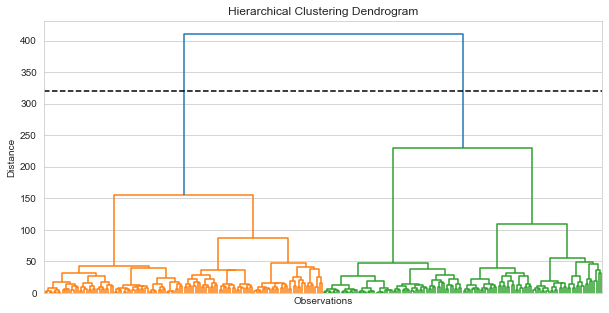

In [57]:
hier_cluster = linkage(data_pca, method='ward')
plt.figure(figsize=(10,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_cluster, truncate_mode='level', p = 7, show_leaf_counts=False, no_labels=True)
plt.axhline(y=320
            ,color='black',linestyle='--') 
plt.show()

From the above dendogram we can see 2 clusters.

In [58]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')
ac.fit(data_pca)

AgglomerativeClustering()

In [59]:
y_ac=ac.fit_predict(data_pca)
collections.Counter(y_ac)

Counter({0: 3062, 1: 2758})

### Scatter Plot for Agglomerative Clustering

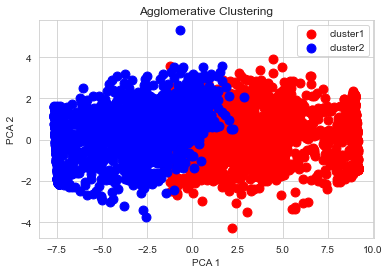

In [60]:
# Visualising the clusters
plt.scatter(pca_df[y_ac==0,0],pca_df[y_ac==0,1],s=80,c='red',label='cluster1')
plt.scatter(pca_df[y_ac==1,0],pca_df[y_ac==1,1],s=80,c='blue',label='cluster2')
plt.title("Agglomerative Clustering")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

### Comparing proportion of observation in different clusters from different clustering techniques.

In [61]:
clusters = ['Kmean','Agglomerative']
pd.DataFrame({'K_Clusters':k_clusters, 'Agglomerative':ac_2.clusters})

,K_Clusters,Agglomerative
1,2365,1554.0
2,2225,NaN
0,1230,4266.0


### Adding labels to the data obtained through clustering

Labelling through K means clustering

In [62]:
df_new_kmeans=data.copy()

In [63]:
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(df_new_kmeans)
df_new_kmeans['label'] = kmeans.labels_
df_new_kmeans.head(10)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,label
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.498760,1.453023,1.492837,1.481107,...,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,0
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,...,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,1
5,-2.06785,-1.430719,-0.402174,0.897990,0.160501,0.798012,0.720635,0.655231,0.714315,0.699173,...,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,0
6,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.798012,0.720635,0.655231,0.714315,0.699173,...,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,0
7,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,1.543745,1.498760,1.453023,1.492837,1.481107,...,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,0
8,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.798012,0.720635,0.655231,0.714315,0.699173,...,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,0
9,-2.06785,-1.430719,-0.402174,1.576025,0.901862,0.798012,0.720635,0.655231,0.714315,0.699173,...,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,0


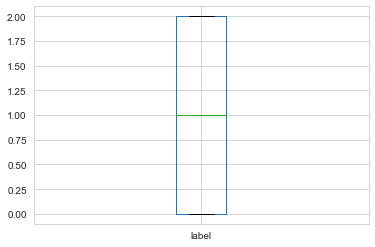

In [64]:
# no outlier 
df_new_kmeans.label.plot(kind='box')
#sns.boxplot(x='label',data=df_new)
plt.show()

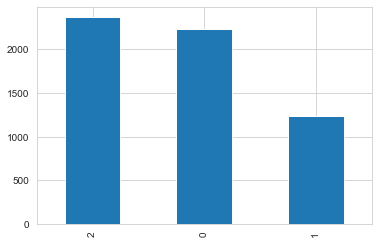

In [65]:
df_new_kmeans.label.value_counts().plot(kind='bar')
plt.show()

In [66]:
df_new_kmeans['label'].value_counts()

2    2365
0    2225
1    1230
Name: label, dtype: int64

Labelling through Agglomerative clustering

In [67]:
df_new_aggl=data.copy()

In [68]:
ac=AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')
ac.fit(df_new_aggl)
df_new_aggl['label'] = ac.labels_
df_new_aggl.head(10)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,label
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,0
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,0
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.498760,1.453023,1.492837,1.481107,...,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,0
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,0
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,...,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,1
5,-2.06785,-1.430719,-0.402174,0.897990,0.160501,0.798012,0.720635,0.655231,0.714315,0.699173,...,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,0
6,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.798012,0.720635,0.655231,0.714315,0.699173,...,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,0
7,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,1.543745,1.498760,1.453023,1.492837,1.481107,...,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,0
8,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.798012,0.720635,0.655231,0.714315,0.699173,...,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,0
9,-2.06785,-1.430719,-0.402174,1.576025,0.901862,0.798012,0.720635,0.655231,0.714315,0.699173,...,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,0


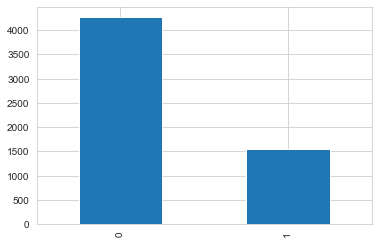

In [69]:
df_new_aggl.label.value_counts().plot(kind='bar')
plt.show()

In [70]:
# sns.pairplot(df_new,hue='label')
# plt.show()

#### Splitting the data before PCA

##### Through k means

In [71]:
df_new_kmeans.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,label
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,...,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,0
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,...,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,1


In [72]:
X=df_new_kmeans.drop(columns='label')
y=df_new_kmeans['label']

In [73]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4074, 33)
(1746, 33)
(4074,)
(1746,)


#### Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)

LogisticRegression()

In [75]:
print('Training score =', lr.score(Xtrain, ytrain))
print('Test score =', lr.score(Xtest, ytest))

Training score = 0.9985272459499264
Test score = 0.993127147766323


In [76]:
ypred1=lr.predict(Xtest)

In [77]:
acc1=(metrics.accuracy_score(ytest,ypred1))
acc1

0.993127147766323

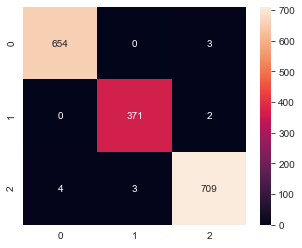

In [78]:
plt.figure(figsize=(5,4))
cm = confusion_matrix(ytest, ypred1)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

#### Decision Tree Classifier

In [79]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)

print('Training score =', dt.score(Xtrain, ytrain))
print('Test score =', dt.score(Xtest, ytest))

Training score = 1.0
Test score = 0.9347079037800687


In [80]:
ypred2=dt.predict(Xtest)

In [81]:
acc2=(metrics.accuracy_score(ytest,ypred2))
acc2

0.9347079037800687

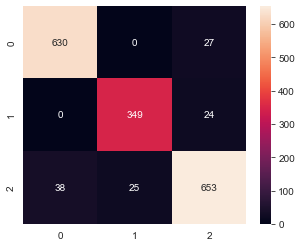

In [82]:
plt.figure(figsize=(5,4))
cm = confusion_matrix(ytest, ypred2)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

#### KNN

In [83]:
score=[]
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain, ytrain)
    ypred3=knn.predict(Xtest)
    accuracy=metrics.accuracy_score(ypred3,ytest)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.9587628865979382
2 :  0.9541809851088202
3 :  0.9593356242840779
4 :  0.9599083619702177
5 :  0.9599083619702177
6 :  0.9616265750286369
7 :  0.9633447880870561
8 :  0.9599083619702177
9 :  0.9639175257731959
10 :  0.9593356242840779
11 :  0.9604810996563574
12 :  0.9604810996563574
13 :  0.9621993127147767
14 :  0.9604810996563574
15 :  0.9604810996563574
16 :  0.9610538373424972
17 :  0.9610538373424972
18 :  0.9610538373424972
19 :  0.9627720504009164
20 :  0.9621993127147767
21 :  0.9616265750286369
22 :  0.9581901489117984
23 :  0.9587628865979382
24 :  0.9587628865979382
25 :  0.9558991981672395
26 :  0.9558991981672395
27 :  0.9576174112256587
28 :  0.9553264604810997
29 :  0.9558991981672395
30 :  0.9553264604810997
31 :  0.9581901489117984
32 :  0.9576174112256587
33 :  0.9581901489117984
34 :  0.9570446735395189
35 :  0.9558991981672395
36 :  0.9570446735395189
37 :  0.9570446735395189
38 :  0.9564719358533792
39 :  0.9558991981672395
40 :  0.9553264604810997
41 :  0.9

In [84]:
score.index(max(score))+1

9

In [85]:
round(max(score))

96

In [86]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(Xtrain, ytrain)

print('Training score =', knn.score(Xtrain, ytrain))
print('Test score =', knn.score(Xtest, ytest))

Training score = 0.976926853215513
Test score = 0.9639175257731959


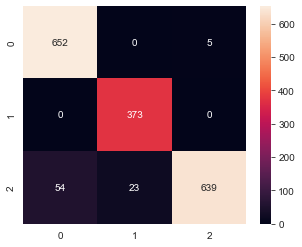

In [87]:
plt.figure(figsize=(5,4))
cm = confusion_matrix(ytest, ypred3)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

##### Through Agglomerative

In [88]:
df_new_aggl.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,label
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,0
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,0
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,...,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,0
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,0
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,...,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,1


In [89]:
X=df_new_aggl.drop(columns='label')
y=df_new_aggl['label']

In [90]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4074, 33)
(1746, 33)
(4074,)
(1746,)


In [91]:
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)

LogisticRegression()

In [92]:
print('Training score =', lr.score(Xtrain, ytrain))
print('Test score =', lr.score(Xtest, ytest))

Training score = 0.9796269023073146
Test score = 0.97709049255441


In [93]:
ypred1=lr.predict(Xtest)

In [94]:
acc1=(metrics.accuracy_score(ytest,ypred1))
acc1

0.97709049255441

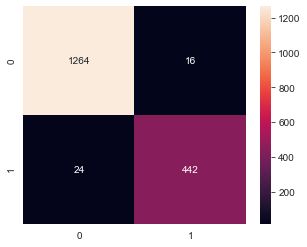

In [95]:
plt.figure(figsize=(5,4))
cm = confusion_matrix(ytest, ypred1)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [96]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)

print('Training score =', dt.score(Xtrain, ytrain))
print('Test score =', dt.score(Xtest, ytest))

Training score = 1.0
Test score = 0.9593356242840779


In [97]:
ypred2=dt.predict(Xtest)

In [98]:
acc2=(metrics.accuracy_score(ytest,ypred2))
acc2

0.9593356242840779

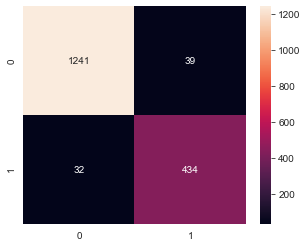

In [99]:
plt.figure(figsize=(5,4))
cm = confusion_matrix(ytest, ypred2)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [100]:
score=[]
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain, ytrain)
    ypred3=knn.predict(Xtest)
    accuracy=metrics.accuracy_score(ypred3,ytest)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.9833906071019473
2 :  0.9759450171821306
3 :  0.979381443298969
4 :  0.9742268041237113
5 :  0.9759450171821306
6 :  0.9753722794959908
7 :  0.9759450171821306
8 :  0.9742268041237113
9 :  0.9747995418098511
10 :  0.9725085910652921
11 :  0.9730813287514318
12 :  0.9742268041237113
13 :  0.9730813287514318
14 :  0.9707903780068728
15 :  0.9719358533791523
16 :  0.9684994272623139
17 :  0.9684994272623139
18 :  0.9684994272623139
19 :  0.9690721649484536
20 :  0.9690721649484536
21 :  0.9696449026345934
22 :  0.9702176403207331
23 :  0.9690721649484536
24 :  0.9696449026345934
25 :  0.9690721649484536
26 :  0.9679266895761741
27 :  0.9667812142038946
28 :  0.9667812142038946
29 :  0.9662084765177549
30 :  0.9667812142038946
31 :  0.9667812142038946
32 :  0.9673539518900344
33 :  0.9667812142038946
34 :  0.9662084765177549
35 :  0.9662084765177549
36 :  0.9662084765177549
37 :  0.9662084765177549
38 :  0.9662084765177549
39 :  0.9662084765177549
40 :  0.9667812142038946
41 :  0.96

In [101]:
score.index(max(score))+1

1

In [102]:
round(max(score))

98

In [103]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(Xtrain, ytrain)

print('Training score =', knn.score(Xtrain, ytrain))
print('Test score =', knn.score(Xtest, ytest))

Training score = 0.9798723613156602
Test score = 0.9747995418098511


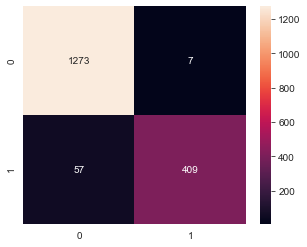

In [104]:
plt.figure(figsize=(5,4))
cm = confusion_matrix(ytest, ypred3)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [105]:
Algorithm=['LogisticRegression(kmeans)','Decision Tree(kmeans)','KNN(kmeans)','LogisticRegression(Aggl)','Decision Tree(Aggl)','KNN(Aggl)']
Train_Accuracy=[0.998,1.00,0.976,0.979,1.00,0.979]
Test_Accuracy=[0.991,0.931,0.965,0.977,0.957,0.974]

In [106]:
Before_PCA = pd.DataFrame({'Algorithm': Algorithm,'Train_Accuracy': Train_Accuracy,'Test_Accuracy':Test_Accuracy})
Before_PCA

,Algorithm,Train_Accuracy,Test_Accuracy
0,LogisticRegression(kmeans),0.998,0.991
1,Decision Tree(kmeans),1.000,0.931
2,KNN(kmeans),0.976,0.965
3,LogisticRegression(Aggl),0.979,0.977
4,Decision Tree(Aggl),1.000,0.957
5,KNN(Aggl),0.979,0.974


#### Splitting the data after PCA

##### Through K means

In [107]:
df_new_kmeans_pca=data_pca.copy()

In [108]:
kmeans = KMeans(3, n_init=5, max_iter=100)
kmeans.fit(df_new_kmeans_pca)
df_new_kmeans_pca['label'] = kmeans.labels_
df_new_kmeans_pca.head()

,0,1,2,3,4,5,6,7,label
0,0.742313,-0.109720,1.314249,-1.204991,-0.270151,1.967466,-1.256584,-0.213435,2
1,0.727500,-0.147146,1.281206,-1.411373,-0.169146,1.776011,-0.331666,0.003125,2
2,-7.586498,0.364230,1.519714,-1.093795,-0.341108,1.509401,-0.487976,-0.019624,0
3,0.727500,-0.147146,1.281206,-1.411373,-0.169146,1.776011,-0.331666,0.003125,2
4,9.054785,-1.113471,0.825711,-1.913832,0.105925,2.042082,0.308037,0.148852,1


In [109]:
X1=df_new_kmeans_pca.drop(columns='label')
y1=df_new_kmeans_pca['label']
X1.columns

Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='object')

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4074, 8)
(1746, 8)
(4074,)
(1746,)


Logistic Regression

In [111]:
lr_kmeans_pca = LogisticRegression()
lr_kmeans_pca.fit(X_train, y_train)
print('Training score =', lr_kmeans_pca.score(X_train, y_train))
print('Test score =', lr_kmeans_pca.score(X_test, y_test))

Training score = 0.9985272459499264
Test score = 0.9971363115693013


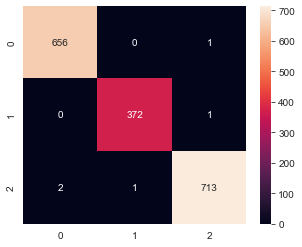

In [112]:
ypred1_pca=lr_kmeans_pca.predict(X_test)
acc1_pca=(metrics.accuracy_score(y_test,ypred1))
acc1_pca
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, ypred1_pca)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Decision Tree Classifier

In [113]:
dt_kmeans_pca = DecisionTreeClassifier()
dt_kmeans_pca.fit(X_train, y_train)
print('Training score =', dt_kmeans_pca.score(X_train, y_train))
print('Test score =', dt_kmeans_pca.score(X_test, y_test))

Training score = 1.0
Test score = 0.995418098510882


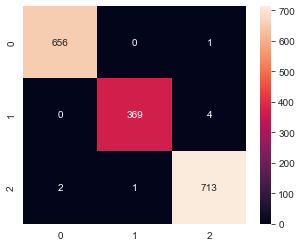

In [114]:
ypred2_pca=dt_kmeans_pca.predict(X_test)
acc2_pca=(metrics.accuracy_score(y_test,ypred1))
acc2_pca
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, ypred2_pca)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

KNN

In [115]:
score=[]
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    ypred=knn.predict(X_test)
    accuracy=metrics.accuracy_score(ypred,y_test)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.9707903780068728
2 :  0.9599083619702177
3 :  0.9765177548682703
4 :  0.9707903780068728
5 :  0.9765177548682703
6 :  0.97709049255441
7 :  0.9799541809851088
8 :  0.9747995418098511
9 :  0.9776632302405498
10 :  0.97709049255441
11 :  0.9776632302405498
12 :  0.9765177548682703
13 :  0.97709049255441
14 :  0.9742268041237113
15 :  0.97709049255441
16 :  0.9776632302405498
17 :  0.9776632302405498
18 :  0.9776632302405498
19 :  0.979381443298969
20 :  0.9788087056128293
21 :  0.9799541809851088
22 :  0.9782359679266895
23 :  0.979381443298969
24 :  0.9776632302405498
25 :  0.9782359679266895
26 :  0.9776632302405498
27 :  0.9765177548682703
28 :  0.9747995418098511
29 :  0.9765177548682703
30 :  0.9736540664375716
31 :  0.9747995418098511
32 :  0.9736540664375716
33 :  0.9765177548682703
34 :  0.9753722794959908
35 :  0.9765177548682703
36 :  0.9759450171821306
37 :  0.9759450171821306
38 :  0.9759450171821306
39 :  0.9753722794959908
40 :  0.9753722794959908
41 :  0.97479954180

In [116]:
score.index(max(score))+1

7

In [117]:
(max(score))

97.99541809851088

In [118]:
knn_kmeans_pca = KNeighborsClassifier(n_neighbors=7)
knn_kmeans_pca.fit(X_train, y_train)

print('Training score =', knn_kmeans_pca.score(X_train, y_train))
print('Test score =', knn_kmeans_pca.score(X_test, y_test))

Training score = 0.9877270495827197
Test score = 0.9799541809851088


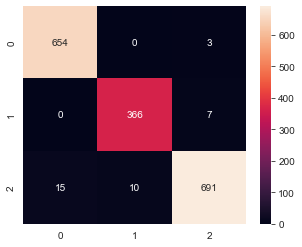

In [119]:
ypred3_pca=knn_kmeans_pca.predict(X_test)
acc3_pca=(metrics.accuracy_score(y_test,ypred1))
acc3_pca
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, ypred3_pca)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

##### Through Agglomerative

In [120]:
df_new_aggl_pca=data_pca.copy()
ac=AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')
ac.fit(df_new_aggl_pca)
df_new_aggl_pca['label'] = ac.labels_
df_new_aggl_pca.head(10)


,0,1,2,3,4,5,6,7,label
0,0.742313,-0.109720,1.314249,-1.204991,-0.270151,1.967466,-1.256584,-0.213435,0
1,0.727500,-0.147146,1.281206,-1.411373,-0.169146,1.776011,-0.331666,0.003125,0
2,-7.586498,0.364230,1.519714,-1.093795,-0.341108,1.509401,-0.487976,-0.019624,1
3,0.727500,-0.147146,1.281206,-1.411373,-0.169146,1.776011,-0.331666,0.003125,0
4,9.054785,-1.113471,0.825711,-1.913832,0.105925,2.042082,0.308037,0.148852,0
5,-3.465004,0.507352,1.567882,-1.377277,-0.206727,1.356062,0.494165,0.193614,1
6,-3.408806,-0.327695,1.199995,-1.334274,-0.202521,1.737894,-0.388887,0.006448,1
7,-7.545112,-0.508243,1.118783,-1.257174,-0.235896,1.699778,-0.446109,0.009770,1
8,-3.550615,-0.365196,1.274419,-1.316220,-0.204982,1.703709,-0.294566,-0.313599,1
9,-3.506390,1.379825,1.968813,-1.213898,-0.311939,1.165686,0.452298,0.164220,1


In [121]:
X1=df_new_aggl_pca.drop(columns='label')
y1=df_new_aggl_pca['label']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4074, 8)
(1746, 8)
(4074,)
(1746,)


In [123]:
lr_aggl_pca = LogisticRegression()
lr_aggl_pca.fit(X_train, y_train)
print('Training score =', lr_aggl_pca.score(X_train, y_train))
print('Test score =', lr_aggl_pca.score(X_test, y_test))

Training score = 0.9813451153657339
Test score = 0.983963344788087


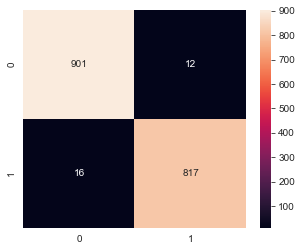

In [124]:
ypred1_pca=lr_aggl_pca.predict(X_test)
acc1_pca=(metrics.accuracy_score(y_test,ypred1))
acc1_pca
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, ypred1_pca)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [125]:
dt_aggl_pca = DecisionTreeClassifier()
dt_aggl_pca.fit(X_train, y_train)
print('Training score =', dt_aggl_pca.score(X_train, y_train))
print('Test score =', dt_aggl_pca.score(X_test, y_test))

Training score = 1.0
Test score = 0.9656357388316151


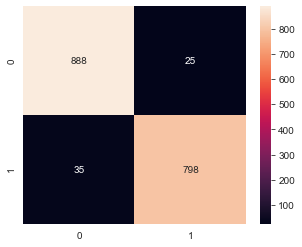

In [126]:
ypred2_pca=dt_aggl_pca.predict(X_test)
acc2_pca=(metrics.accuracy_score(y_test,ypred1))
acc2_pca
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, ypred2_pca)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [127]:
score=[]
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    ypred=knn.predict(X_test)
    accuracy=metrics.accuracy_score(ypred,y_test)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.9908361970217641
2 :  0.983963344788087
3 :  0.9891179839633448
4 :  0.9828178694158075
5 :  0.9885452462772051
6 :  0.983963344788087
7 :  0.9851088201603666
8 :  0.9833906071019473
9 :  0.9851088201603666
10 :  0.9845360824742269
11 :  0.9856815578465064
12 :  0.9828178694158075
13 :  0.9828178694158075
14 :  0.9810996563573883
15 :  0.9822451317296678
16 :  0.9799541809851088
17 :  0.981672394043528
18 :  0.9788087056128293
19 :  0.9805269186712485
20 :  0.979381443298969
21 :  0.979381443298969
22 :  0.979381443298969
23 :  0.9799541809851088
24 :  0.9788087056128293
25 :  0.979381443298969
26 :  0.9788087056128293
27 :  0.979381443298969
28 :  0.979381443298969
29 :  0.979381443298969
30 :  0.979381443298969
31 :  0.9799541809851088
32 :  0.9782359679266895
33 :  0.979381443298969
34 :  0.979381443298969
35 :  0.9805269186712485
36 :  0.9810996563573883
37 :  0.9810996563573883
38 :  0.9799541809851088
39 :  0.9805269186712485
40 :  0.979381443298969
41 :  0.979954180985108

In [128]:
score.index(max(score))+1

1

In [129]:
(max(score))

99.0836197021764

In [130]:
knn_aggl_pca = KNeighborsClassifier(n_neighbors=7)
knn_aggl_pca.fit(X_train, y_train)

print('Training score =', knn_aggl_pca.score(X_train, y_train))
print('Test score =', knn_aggl_pca.score(X_test, y_test))

Training score = 0.9901816396661758
Test score = 0.9851088201603666


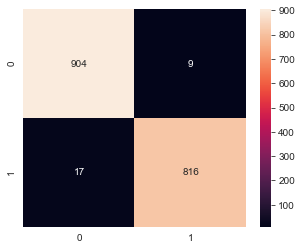

In [131]:
ypred3_pca=knn_aggl_pca.predict(X_test)
acc3_pca=(metrics.accuracy_score(y_test,ypred1))
acc3_pca
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, ypred3_pca)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [132]:
Algorithm=['LogisticRegression(kmeans_pca)','Decision Tree(kmeans_pca)','KNN(kmeans_pca)','LogisticRegression(Aggl_pca)','Decision Tree(Aggl_pca)','KNN(Aggl_pca)']
Train_Accuracy=[0.998,1.00,0.987,.969,1.00,.989]
Test_Accuracy=[0.997,0.994,0.980,.968,.968,.983]

In [133]:
After_PCA = pd.DataFrame({'Algorithm': Algorithm,'Train_Accuracy': Train_Accuracy,'Test_Accuracy':Test_Accuracy})
After_PCA

,Algorithm,Train_Accuracy,Test_Accuracy
0,LogisticRegression(kmeans_pca),0.998,0.997
1,Decision Tree(kmeans_pca),1.000,0.994
2,KNN(kmeans_pca),0.987,0.980
3,LogisticRegression(Aggl_pca),0.969,0.968
4,Decision Tree(Aggl_pca),1.000,0.968
5,KNN(Aggl_pca),0.989,0.983


In [134]:
Algorithm=['LR BPCA KMEANS','DT BPCA KMEANS','KNN BPCA KMEANS','LR BPCA AGGL','DT BPCA AGGL','KNN BPCA AGGL','LR APCA KMEANS','DT APCA KMEANS','KNN APCA KMEANS','LR APCA AGGL','DT APCA AGGL','KNN APCA AGGL']
Train_Accuracy=[0.998,1.00,0.976,0.979,1.00,0.979,0.998,1.00,0.987,.969,1.00,.989]
Test_Accuracy=[0.991,0.931,0.965,0.977,0.957,0.974,0.997,0.994,0.980,.968,.968,.983]

In [135]:
Final = pd.DataFrame({'Algorithm': Algorithm,'Train_Accuracy': Train_Accuracy,'Test_Accuracy':Test_Accuracy})
Final

,Algorithm,Train_Accuracy,Test_Accuracy
0,LR BPCA KMEANS,0.998,0.991
1,DT BPCA KMEANS,1.000,0.931
2,KNN BPCA KMEANS,0.976,0.965
3,LR BPCA AGGL,0.979,0.977
4,DT BPCA AGGL,1.000,0.957
5,KNN BPCA AGGL,0.979,0.974
6,LR APCA KMEANS,0.998,0.997
7,DT APCA KMEANS,1.000,0.994
8,KNN APCA KMEANS,0.987,0.980
9,LR APCA AGGL,0.969,0.968


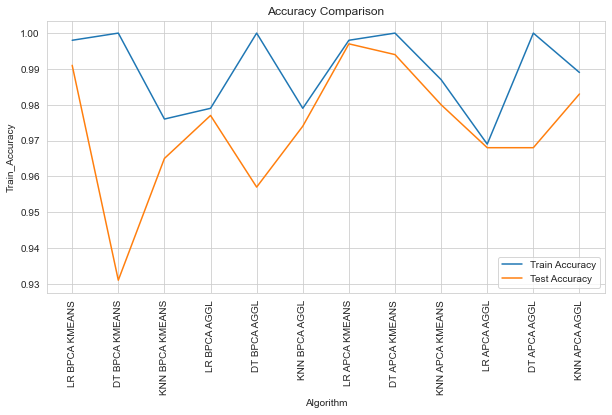

In [136]:
plt.subplots(figsize=(10,5))
sns.lineplot(x="Algorithm", y="Train_Accuracy",data=Final,palette='hot',label='Train Accuracy')
sns.lineplot(x="Algorithm", y="Test_Accuracy",data=Final,palette='hot',label='Test Accuracy')

plt.xticks(rotation=90)
plt.title('Accuracy Comparison')
plt.legend()
plt.show()

## Conclusion

Logistic Regression after PCA through K means Clustering gives the best train and test accuracy 